Linear Regression Model for predicting the number of medals a country will obtain in the upcoming Olympics

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# Read in file
teams = pd.read_csv("teams.csv")

In [3]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [4]:
# Trim unnecessary columns
teams = teams[{"team","country","year","athletes","age","prev_medals","medals"}]

In [5]:
teams

,year,athletes,country,age,prev_medals,team,medals
0,1964,8,Afghanistan,22.0,0.0,AFG,0
1,1968,5,Afghanistan,23.2,0.0,AFG,0
2,1972,8,Afghanistan,29.0,0.0,AFG,0
3,1980,11,Afghanistan,23.6,0.0,AFG,0
4,2004,5,Afghanistan,18.6,0.0,AFG,0
...,...,...,...,...,...,...,...
2139,2000,26,Zimbabwe,25.0,0.0,ZIM,0
2140,2004,14,Zimbabwe,25.1,0.0,ZIM,3
2141,2008,16,Zimbabwe,26.1,3.0,ZIM,4
2142,2012,9,Zimbabwe,27.3,4.0,ZIM,0


In [6]:
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

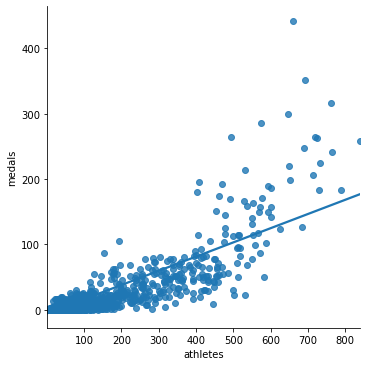

In [7]:
# Plotting the correlation between medals and athlete count
sns.lmplot(x="athletes",y="medals", data = teams, fit_reg=True,ci=None)

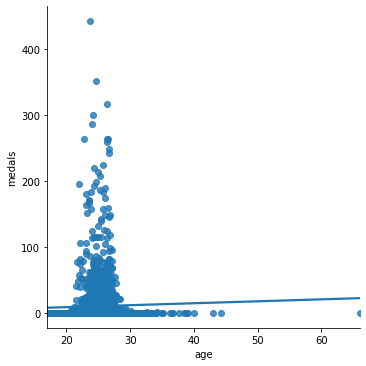

In [8]:
# Plotting to show the correlation between age and medals
# Despite a correlation between medals and ages between 20-30
# Correlation is not always causation
sns.lmplot(x="age",y="medals", data = teams, fit_reg=True,ci=None)

<AxesSubplot:ylabel='Frequency'>

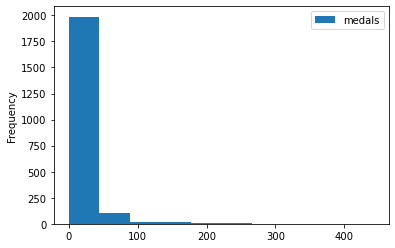

In [9]:
teams.plot.hist(y="medals")

In [10]:
# Show rows where null values exist
teams[teams.isnull().any(axis=1)]

,year,athletes,country,age,prev_medals,team,medals
19,1992,9,Albania,25.3,NaN,ALB,0
26,1964,7,Algeria,26.0,NaN,ALG,0
39,1976,3,Andorra,28.3,NaN,AND,0
50,1980,17,Angola,17.4,NaN,ANG,0
59,1976,17,Antigua and Barbuda,23.2,NaN,ANT,0
...,...,...,...,...,...,...,...
2092,1988,6,Saint Vincent and the Grenadines,20.5,NaN,VIN,0
2103,1984,3,North Yemen,27.7,NaN,YAR,0
2105,1992,8,Yemen,19.6,NaN,YEM,0
2112,1988,5,South Yemen,23.6,NaN,YMD,0


In [11]:
# Drop all NaN rows
teams = teams.dropna()

In [12]:
teams

,year,athletes,country,age,prev_medals,team,medals
0,1964,8,Afghanistan,22.0,0.0,AFG,0
1,1968,5,Afghanistan,23.2,0.0,AFG,0
2,1972,8,Afghanistan,29.0,0.0,AFG,0
3,1980,11,Afghanistan,23.6,0.0,AFG,0
4,2004,5,Afghanistan,18.6,0.0,AFG,0
...,...,...,...,...,...,...,...
2139,2000,26,Zimbabwe,25.0,0.0,ZIM,0
2140,2004,14,Zimbabwe,25.1,0.0,ZIM,3
2141,2008,16,Zimbabwe,26.1,3.0,ZIM,4
2142,2012,9,Zimbabwe,27.3,4.0,ZIM,0


In [13]:
# Set training data set as all teams prior to 2012
# Set testing data as the remaining teams for measuring accurary 
train = teams[teams["year"]<2012].copy()
test = teams[teams["year"]>=2012].copy()

In [14]:
# Fetch the dimensions of the training and testing sets
train.shape

(1609, 7)

In [15]:
test.shape

(405, 7)

In [40]:
# Assign a varible to linear regression
reg = lr()

In [41]:
# Assign predictors to calculate the target
predictors = ["athletes","prev_medals"]
target = "medals"

In [42]:
# Set the arguments for linear regression
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [43]:
# Assign the predicted values to a varible
predictions = reg.predict(test[predictors])

In [44]:
# Assign these values to a new column "Predictions"
test["predictions"] = predictions

In [46]:
# Assign all predicted values less than 0 to 0
# Round the rest of the predicted values 
# Countries can't win half a medal or a negative medal!
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()

In [47]:
test

,year,athletes,country,age,prev_medals,team,medals,predictions
6,2012,6,Afghanistan,24.8,1.0,AFG,1,0.0
7,2016,3,Afghanistan,24.7,1.0,AFG,0,0.0
24,2012,10,Albania,25.7,0.0,ALB,0,0.0
25,2016,6,Albania,23.7,0.0,ALB,0,0.0
37,2012,39,Algeria,24.8,2.0,ALG,1,2.0
...,...,...,...,...,...,...,...,...
2111,2016,3,Yemen,19.3,0.0,YEM,0,0.0
2131,2012,7,Zambia,22.6,0.0,ZAM,0,0.0
2132,2016,7,Zambia,24.1,0.0,ZAM,0,0.0
2142,2012,9,Zimbabwe,27.3,4.0,ZIM,0,2.0


In [51]:
# Calculates the average difference medal and predictions values
error = mae(test["medals"], test["predictions"])

In [52]:
# This value will represent how close on average
# to the actual amount of medals
error

3.2987654320987656

In [53]:
# Check if it's less than the standard deviation
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [57]:
# Difference of predicted number of medals vs actual medal count
errors = (test["medals"] - test["predictions"]).abs()

In [58]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [59]:
# Group this by team and get the average for each team
error_by_team = errors.groupby(test["team"]).mean()

In [60]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [61]:
# Get average of medals earned by each country on average
medals_by_team=test["medals"].groupby(test["team"]).mean()

In [62]:
# Get ratio of error per team and medals earned by the team
error_ratio = error_by_team / medals_by_team

In [64]:
# Remove all NaN values(for when both error and medals is 0)
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [66]:
# Remove infinite values(for when medals is 0 and error is 1)
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

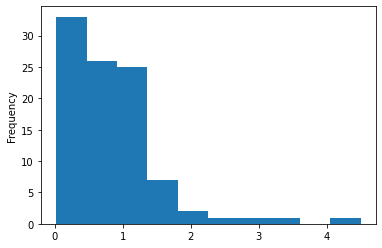

In [67]:
error_ratio.plot.hist()

In [69]:
# Check each country for its error ratio
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64